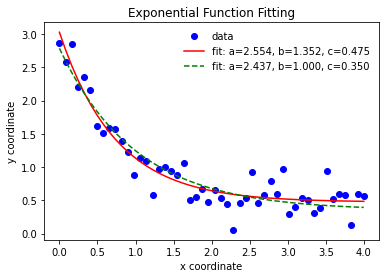

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Define a function(here a exponential function is used)
def func(x, a, b, c):
 return a * np.exp(-b * x) + c

#Create the data to be fit with some noise
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'bo', label='data')

#Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
popt #output: array([ 2.55423706, 1.35190947, 0.47450618])
plt.plot(xdata, func(xdata, *popt), 'r-',
 label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#In the case of parameters a,b,c need be constrainted
#Constrain the optimization to the region of 
#0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt #output: array([ 2.43708906, 1. , 0.35015434])
plt.plot(xdata, func(xdata, *popt), 'g--',
 label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#Labels
plt.title("Exponential Function Fitting")
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
leg = plt.legend()  # remove the frame of Legend, personal choice
leg.get_frame().set_linewidth(0.0) # remove the frame of Legend, personal choice
#leg.get_frame().set_edgecolor('b') # change the color of Legend frame
plt.show()

In [3]:
import numpy as np
import sympy
from sympy import cos, simplify, sin, sinh, tensorcontraction
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, RicciScalar

sympy.init_printing()
syms = sympy.symbols("t chi theta phi")
t, ch, th, ph = syms
m = sympy.diag(-1, cos(t) ** 2, cos(t) ** 2 * sinh(ch) ** 2, cos(t) ** 2 * sinh(ch) ** 2 * sin(th) ** 2).tolist()
metric = MetricTensor(m, syms)
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡-3.0       0                             0                                   
⎢                                                                             
⎢             2                                                               
⎢ 0    3.0⋅cos (t)                        0                                   
⎢                                                                             
⎢                   ⎛   2       ⎞     2             2        2                
⎢ 0         0       ⎝sin (t) - 1⎠⋅sinh (χ) + 4.0⋅cos (t)⋅sinh (χ)             
⎢                                                                             
⎢                                                                  ⎛   2      
⎣ 0         0                             0                        ⎝sin (t) - 

                   0                              ⎤
                                                  ⎥
                                                  ⎥
                   0                              ⎥
 

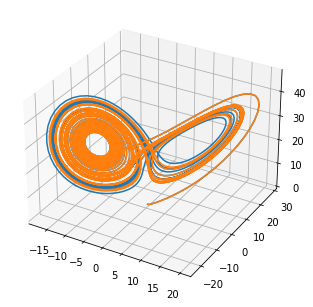

In [1]:
from scipy.integrate import odeint 
import numpy as np 

def lorenz(w, t, p, r, b): 
    # 给出位置矢量w，和三个参数p, r, b计算出
    # dx/dt, dy/dt, dz/dt的值
    x, y, z = w
    # 直接与lorenz的计算公式对应 
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z]) 

t = np.arange(0, 30, 0.01) # 创建时间点 
# 调用ode对lorenz进行求解, 用两个不同的初始值 
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0)) 
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0)) 

# 绘图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2])
ax.plot(track2[:,0], track2[:,1], track2[:,2])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from openpyxl import load_workbook
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

#data
galaxynum=98
excel=load_workbook('data.xlsx')
table1=excel["Sheet1"]

name=table1.cell(row=galaxynum,column=1).value
Lum=table1.cell(row=galaxynum,column=3).value
radius=table1.cell(row=galaxynum,column=4).value
Hi=1.4*table1.cell(row=galaxynum,column=5).value
picname="result/"+name
#先验分布区间
ratio_max=10
gamma_max=1/radius


table3 = excel[name]
x1=[]
y1=[]
error1=[]

for cell in table3['A']:
 x1.append(cell.value)

for cell in table3['B']:
 y1.append(cell.value)

for cell in table3['C']:
    error1.append(cell.value)

xdata=np.array(x1)
ydata=np.array(y1)
error=np.array(error1)
plt.errorbar(xdata,ydata,yerr=error,fmt='o',label='data',ms=3,color='blue',ecolor='skyblue',elinewidth=2,capsize=4)


#define velocity function of proper distance L
def velocity(L,ratio,gamma):
    q = Hi/ratio/Lum/16
    a = 1/gamma/radius

    def intfunc(th,x1,x2):
        return ((1-gamma*x1)**(a-1)+q*(1-gamma*x1)**(a/4-1))*(-1/gamma*np.log(1-gamma*x1)) *(x2-x1*np.cos(th))/(x1**2+x2**2-2*x1*x2*np.cos(th))**(3/2)

    def acc(x):
        if isinstance(x,float):
            y, err = integrate.dblquad(intfunc,0,1/gamma,lambda x1:0.001,lambda x1:np.pi, args=(x,))  
        else:
            y=np.empty(len(x))
            for i in range(len(x)):
                x2=x[i]
                v, err = integrate.dblquad(intfunc,0,1/gamma,lambda x1:0.001,lambda x1:np.pi,args=(x2,))
                y[i]=v
        return 2*y

    x=1/gamma*(1-np.exp(-gamma*L))
    return (0.684*ratio*Lum* 10**3 * x * acc(x)/radius**2)**(1/2)

#Fitting, parameters ratio and gamma* with constraintion
popt, pcov = curve_fit(velocity, xdata, ydata, bounds=(0, [ratio_max,gamma_max]))
print(popt)

#Plot
xfit=np.linspace(0,1.1*max(xdata), 20)
yfit=velocity(xfit, *popt)
xnew = np.linspace(xfit.min(),xfit.max(),50)
yfit_smooth = make_interp_spline(xfit,yfit)(xnew)
plt.plot(xnew, yfit_smooth, 'r-', label='fitting curve')
plt.title(name,y=0,fontsize=20)
plt.xlabel('proper distance/kpc')
plt.ylabel('rotation velocity/km/s')
plt.legend()
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.savefig(picname)
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from openpyxl import load_workbook
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

#data
galaxynum=103
excel=load_workbook('data.xlsx')
table1=excel["Sheet1"]

name=table1.cell(row=galaxynum,column=1).value
Lum=table1.cell(row=galaxynum,column=3).value
radius=table1.cell(row=galaxynum,column=4).value
Hi=1.4*table1.cell(row=galaxynum,column=5).value
picname="result/"+name
#先验分布区间
ratio_max=10
gamma_min=0.1/radius
gamma_max=0.5/radius


table3 = excel[name]
x1=[]
y1=[]
error1=[]

for cell in table3['A']:
 x1.append(cell.value)

for cell in table3['B']:
 y1.append(cell.value)

for cell in table3['C']:
    error1.append(cell.value)

xdata=np.array(x1)
ydata=np.array(y1)
error=np.array(error1)
plt.errorbar(xdata,ydata,yerr=error,fmt='o',label='data',ms=3,color='blue',ecolor='skyblue',elinewidth=2,capsize=4)


#define velocity function of proper distance L
def velocity(L,ratio,gamma):

    def x(L):
        return 1/gamma*(1-np.exp(-gamma*L))

    def intfunc(th,L1,L2):
        x1=x(L1)
        x2=x(L2)
        return L1*(np.exp(-L1/radius)+q*np.exp(-L1/radius/4))*(x2-x1*np.cos(th))/(x1**2+x2**2-2*x1*x2*np.cos(th))**(3/2)

    def acc(L):
        if isinstance(L,float):
            y, err = integrate.dblquad(intfunc,0,10*radius,lambda L1:0.001,lambda L1:np.pi, args=(L,))  
        else:
            y=np.empty(len(L))
            for i in range(len(L)):
                L2=L[i]
                if L2==0:
                    y[i]=0
                else:
                    v, err = integrate.dblquad(intfunc,0,10*radius,lambda L1:0.001,lambda L1:np.pi,args=(L2,))
                    y[i]=v
        return 2*y

    q = Hi/ratio/Lum/16
    return (0.684*ratio*Lum* 10**3 * x(L) * acc(x(L))/radius**2)**(1/2)

#Fitting, parameters ratio and gamma* with constraintion
popt, pcov = curve_fit(velocity, xdata, ydata, bounds=([0,gamma_min], [ratio_max,gamma_max]))
print(popt)

#Plot
xfit=np.linspace(0,1.1*max(xdata), 20)
yfit=velocity(xfit, *popt)
xnew = np.linspace(xfit.min(),xfit.max(),50)
yfit_smooth = make_interp_spline(xfit,yfit)(xnew)
plt.plot(xnew, yfit_smooth, 'r-', label='fitting curve')
plt.title(name,y=0,fontsize=20)
plt.savefig(picname)
plt.show()